In [1]:
#Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Load the Groceries dataset
df = pd.read_csv("/content/sample_data/Groceries_dataset.csv")

# Step 4: Check the dataset structure
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
# Group transactions by 'Member_number' or 'Date' (assuming multiple purchases per customer)
transactions = df.groupby("Member_number")["itemDescription"].apply(list).tolist()

In [5]:
# Convert transaction data into a format suitable for analysis
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [6]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)  # Adjust support threshold as needed
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
      support                                           itemsets
0    0.078502                                         (UHT-milk)
1    0.031042                                    (baking powder)
2    0.119548                                             (beef)
3    0.079785                                          (berries)
4    0.062083                                        (beverages)
..        ...                                                ...
410  0.039764                 (tropical fruit, soda, whole milk)
411  0.054387                         (soda, yogurt, whole milk)
412  0.042329               (tropical fruit, yogurt, whole milk)
413  0.031811   (rolls/buns, soda, other vegetables, whole milk)
414  0.034377  (rolls/buns, other vegetables, yogurt, whole m...

[415 rows x 2 columns]


In [7]:
# Extract strong association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules:
               antecedents                                 consequents  \
0               (UHT-milk)                          (other vegetables)   
1       (other vegetables)                                  (UHT-milk)   
2             (rolls/buns)                                  (UHT-milk)   
3               (UHT-milk)                                (rolls/buns)   
4               (UHT-milk)                                (whole milk)   
...                    ...                                         ...   
1039  (yogurt, whole milk)              (rolls/buns, other vegetables)   
1040          (rolls/buns)      (whole milk, yogurt, other vegetables)   
1041    (other vegetables)            (rolls/buns, yogurt, whole milk)   
1042              (yogurt)  (rolls/buns, whole milk, other vegetables)   
1043          (whole milk)      (rolls/buns, yogurt, other vegetables)   

       support  confidence      lift  
0     0.038994    0.496732  1.318979  
1     0.03899

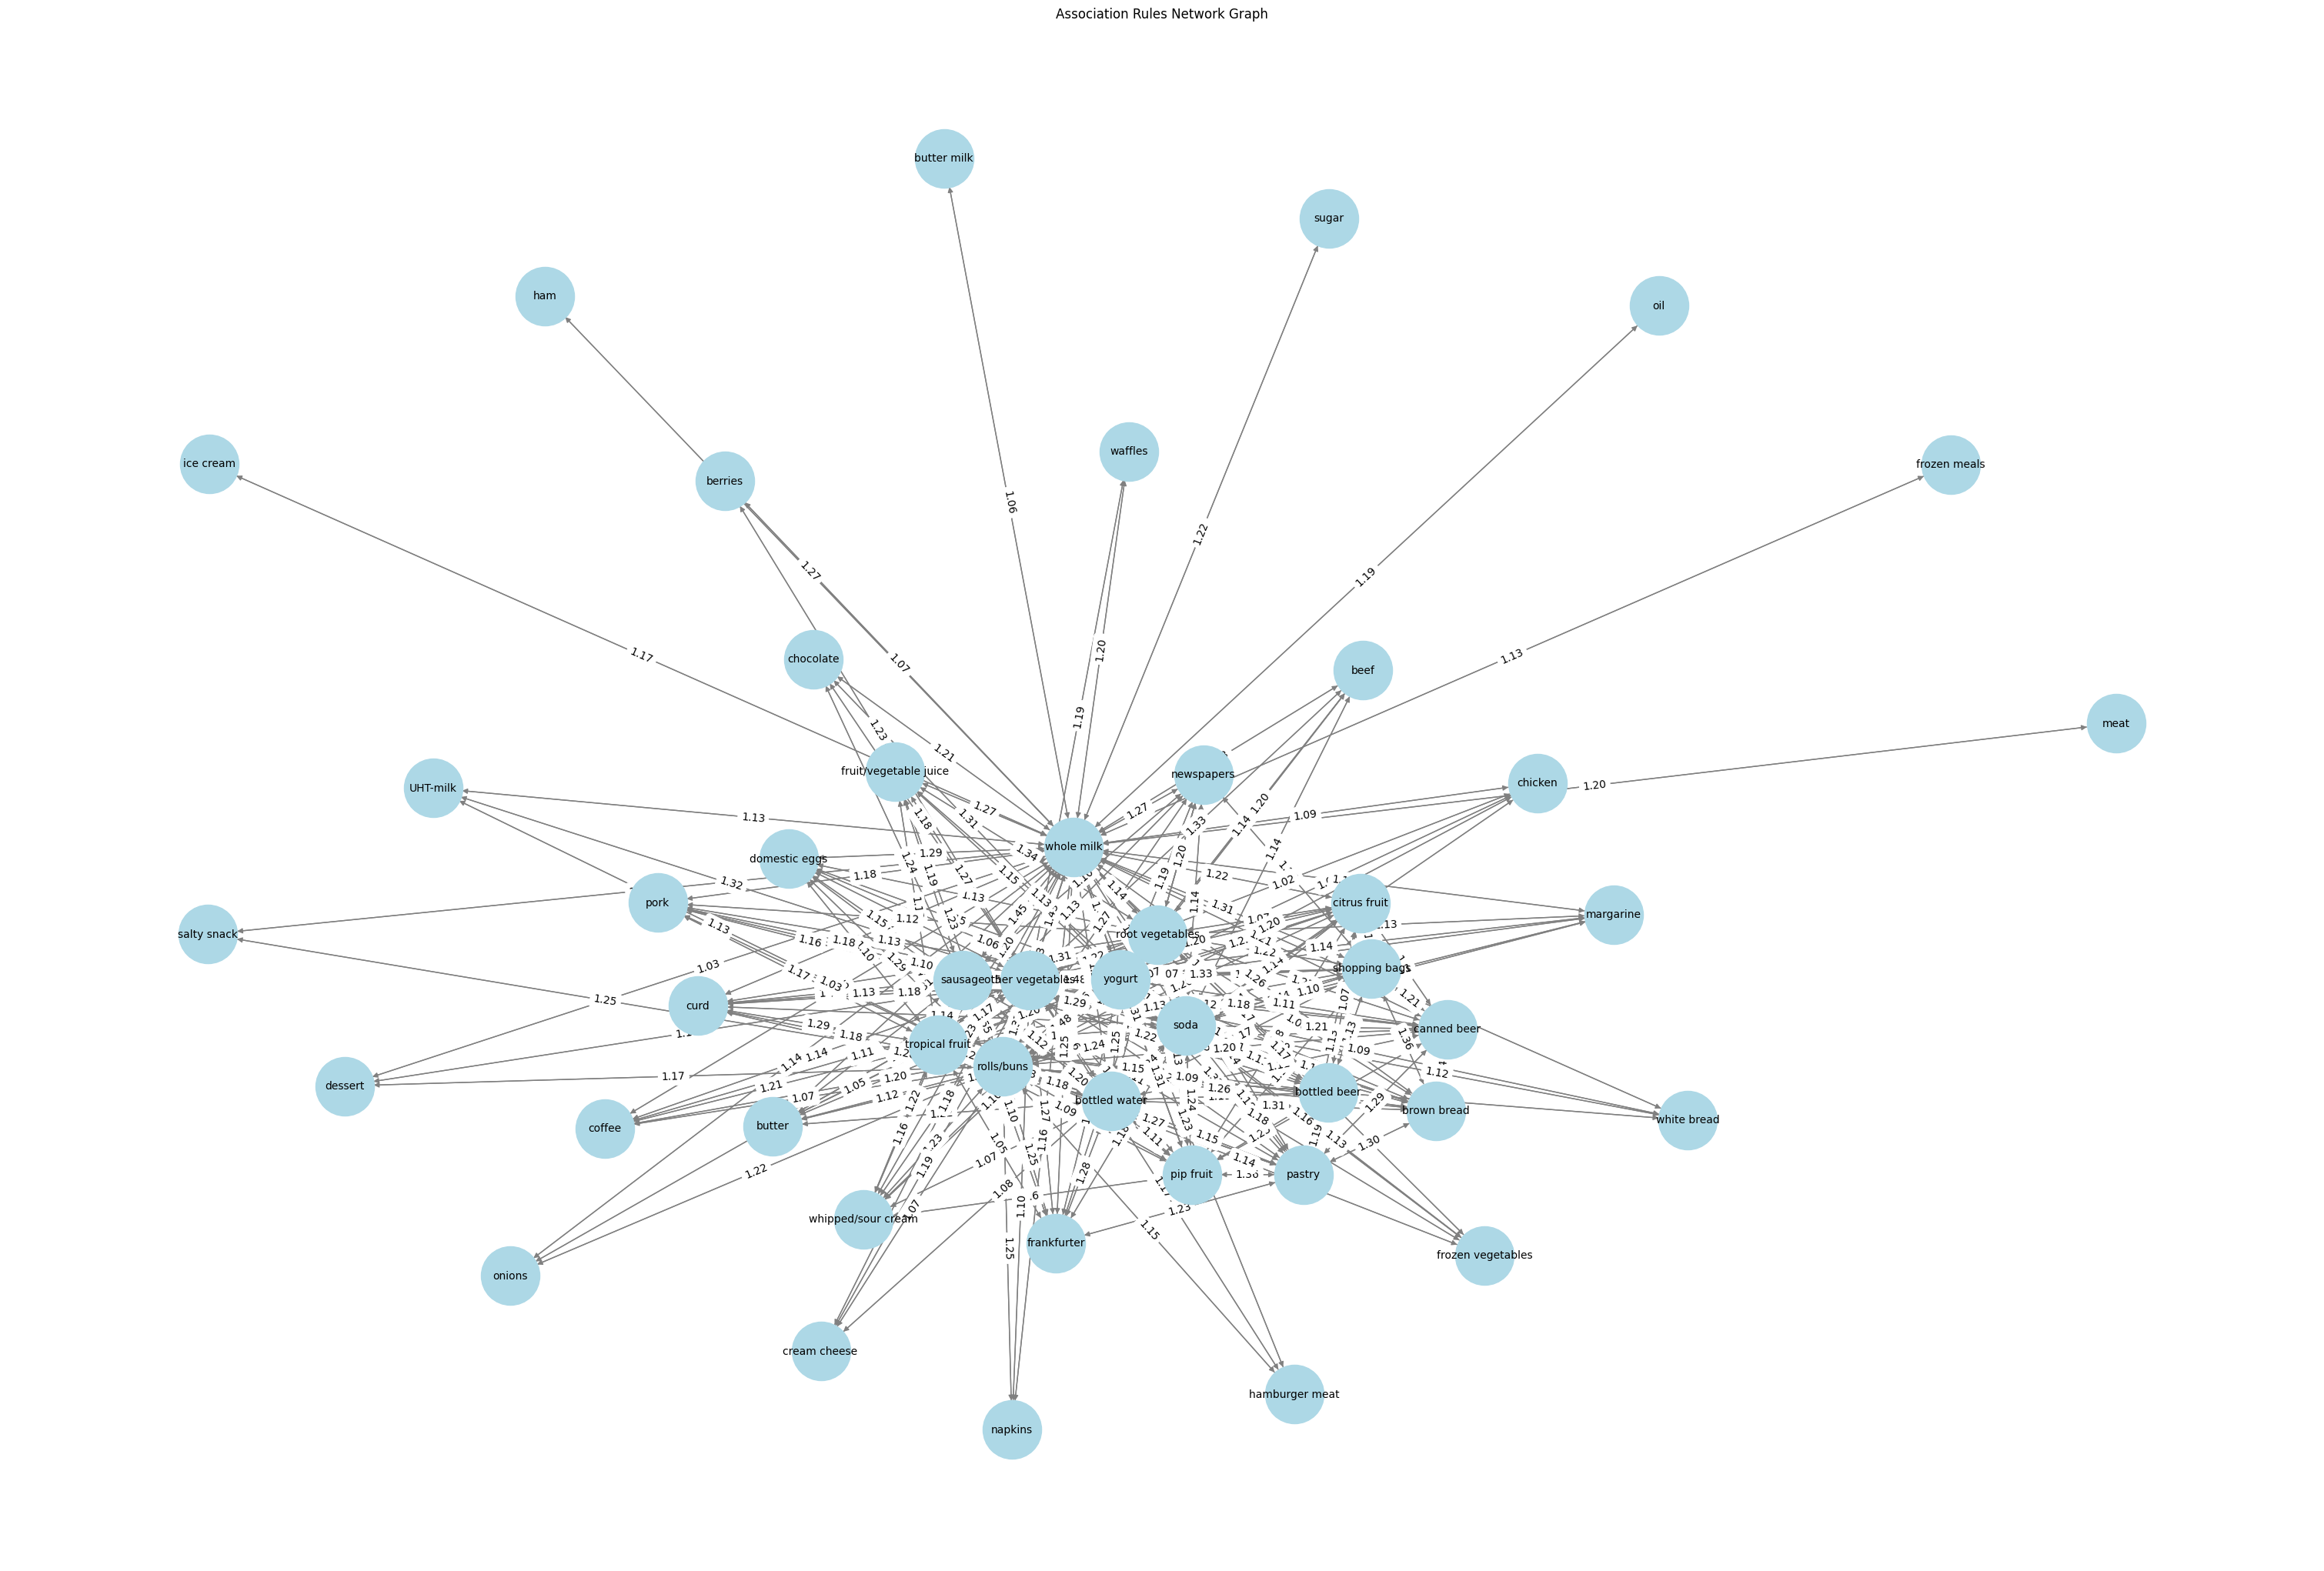

In [9]:
# Step 9: Visualize association rules using a network graph
def draw_network(rules):
    G = nx.DiGraph()

    for _, rule in rules.iterrows():
        for antecedent in rule['antecedents']:
            for consequent in rule['consequents']:
                G.add_edge(antecedent, consequent, weight=rule['lift'])

    plt.figure(figsize=(30, 20))
    pos = nx.spring_layout(G, seed=42)
    edges = G.edges(data=True)

    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title("Association Rules Network Graph")
    plt.show()

draw_network(rules)